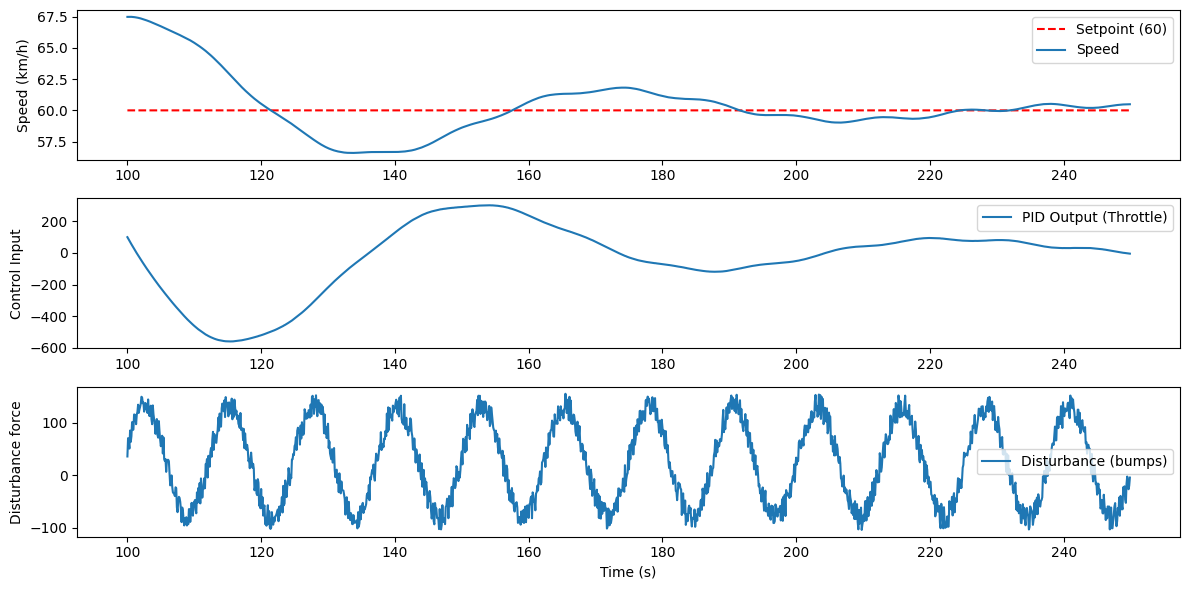

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- PID Controller Class ---
class PID:
    def __init__(self, Kp, Ki, Kd, dt):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.dt = dt
        self.integral = 0
        self.prev_error = 0

    def compute(self, setpoint, measurement):
        error = setpoint - measurement
        self.integral += error * self.dt
        derivative = (error - self.prev_error) / self.dt
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output

# --- Simulation Parameters ---
dt = 0.1          # timestep
time = np.arange(0, 250, dt)   # 200 seconds
setpoint = 60     # km/h
m = 1200          # effective mass of car (kg, arbitrary scaling)

# --- Initialize ---
v = 0             # initial speed
pid = PID(Kp=50, Ki=10, Kd=10, dt=dt)
velocities = []
controls = []
disturbances = []

# --- Disturbance function f(t) ---
def disturbance(t):
    # Example: sinusoidal bumps + random noise
    return 100*np.sin(0.5*t) + 50*(np.random.rand()+ np.where(t >=50, 1, 0)*np.cos(0.5*(t-50)))

# --- Simulation Loop ---
for t in time:
    d = disturbance(t)
    u = pid.compute(setpoint, v)   # PID throttle
    dv = (u - d) / m               # dynamics
    v += dv * dt                   # integrate speed
    velocities.append(v)
    controls.append(u)
    disturbances.append(d)


indices = np.where((time >= 100) & (time <= 250))
time = time[indices]

velocities = np.array(velocities)[indices]
controls = np.array(controls)[indices]
disturbances = np.array(disturbances)[indices]
# print(time)

#--- Plot Results ---
plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
plt.plot(time, [setpoint]*len(time), 'r--', label="Setpoint (60)")
plt.plot(time, velocities, label="Speed")
plt.ylabel("Speed (km/h)")
plt.legend()

plt.subplot(3,1,2)
plt.plot(time, controls, label="PID Output (Throttle)")
plt.ylabel("Control Input")
plt.legend()

plt.subplot(3,1,3)
plt.plot(time, disturbances, label="Disturbance (bumps)")
plt.ylabel("Disturbance force")
plt.xlabel("Time (s)")
plt.legend()

plt.tight_layout()
plt.show()
